# Mean event number

In [1]:
# First, determine the mean number of events detected with the settings
import numpy as np
# We count the number of events detected in 1 minute
Counts = [
    766,
    742,
    744,
    832,
    807,
    722,
    753,
    772,
    786,
    792,
    792,
    767,
    749,
    751,
    802
]

mean_count = np.mean(Counts)

print(f"Mean count : {mean_count:.0f} for {len(Counts)} measurements")

Mean count : 772 for 15 measurements


# TAC calibration

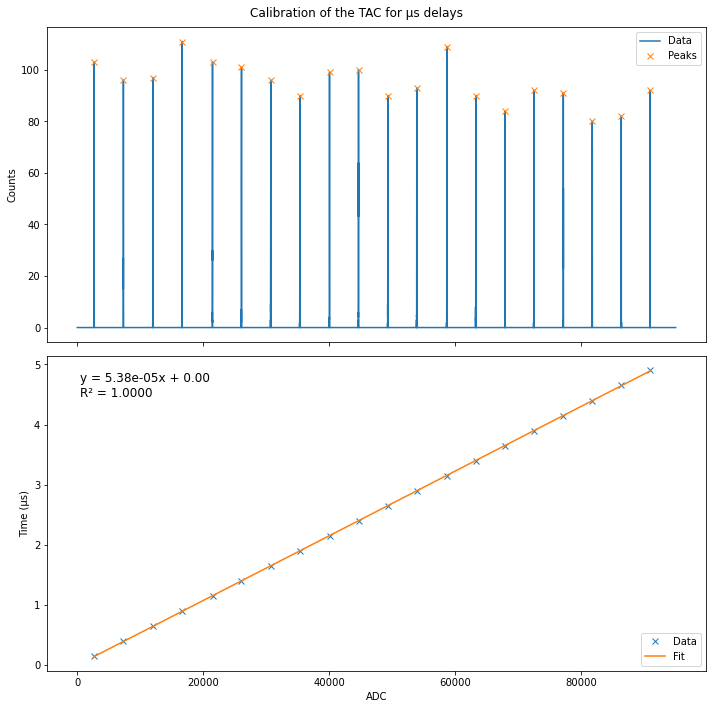

In [2]:
# We will calibrate the ADC-time conversion with the following data

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
popt, (fig, ax) = calibrate_TAC(plot_peaks=True, plot_fit=True)
fig.suptitle("Calibration of the TAC for µs delays")
fig.tight_layout()

# Store the calibration parameters
ADC_to_t = popt

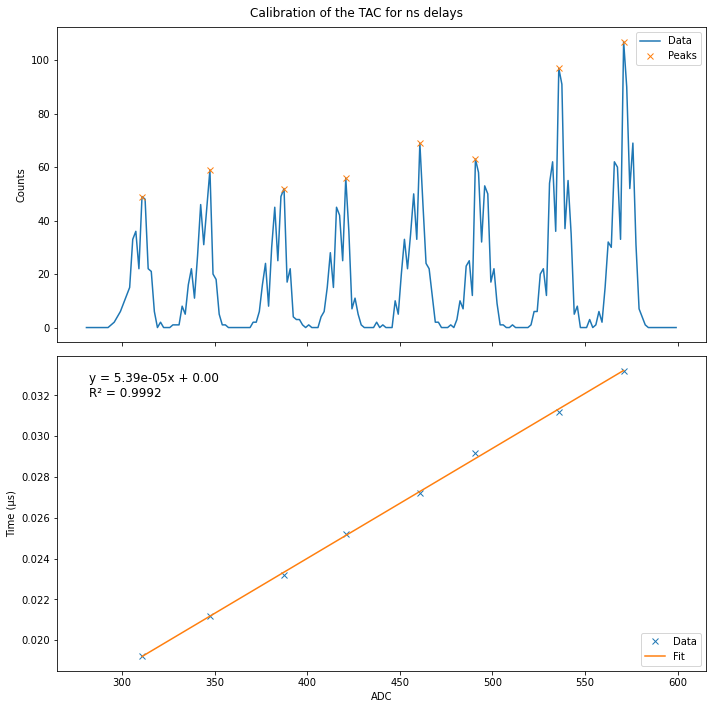

In [3]:
# We will calibrate the ADC-time conversion with the following data
import numpy as np

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
_, (fig, ax) = calibrate_TAC(file = "data/TAC_calibration_spectrum_small_scales.txt",
                                times = (np.arange(16, 32, 2)+3.2)*1e-3,
                                ADC_range = (280, 600),
                                peak_width = 2,
                                peak_height = 40,
                                plot_peaks=True, plot_fit=True)
fig.suptitle("Calibration of the TAC for ns delays")
fig.tight_layout()

# First acquisition
This was our first test with different settings (hence the different calibration).
We are not sure if it actually has any physical meaning.

In [4]:
# Import the data
import numpy as np
file = "data/muon_acquisition_15h40_15-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

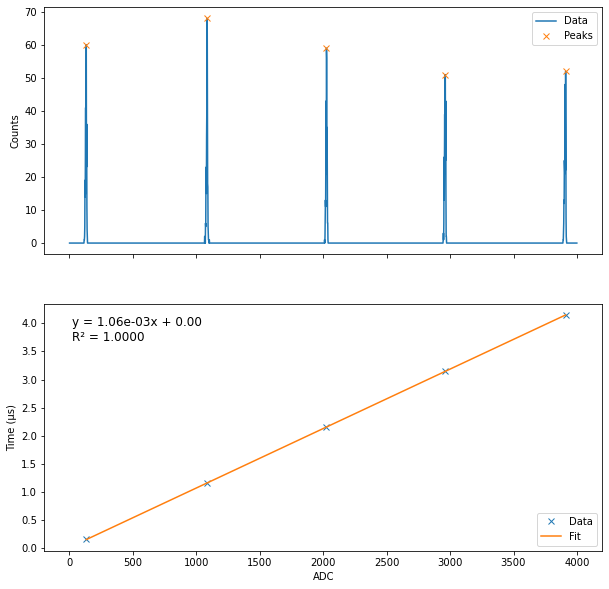

In [5]:
# Calibrate the data (this used another setting)
from muon_hardware.calibration import calibrate_TAC
ADC_to_t, _ = calibrate_TAC(file = "data/TAC_calibration_range200ns.txt",
                         times = np.arange(0,5, 1) + 0.150,
                         ADC_range = (0, 4000),
                         peak_height = 40,
                         peak_width = 1.9,
                         plot_peaks=True, plot_fit=True)

In [6]:
# Convert the data to time
from muon_hardware.utils import linear
data[:,0] = linear(data[:,0], *ADC_to_t)

In [7]:
# Fit an exponantial decay on the data
def exp(x, a, tau):
    return a * np.exp(-x/tau)

from scipy.optimize import curve_fit

mask = np.logical_and((data[:,0] > 20), (data[:,0] < 300)) 
x = data[:,0][mask]
y = data[:,1][mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 100])
popt

array([131.16514235,  15.24946281])

Text(0.5, 1.0, 'First fit of the data')

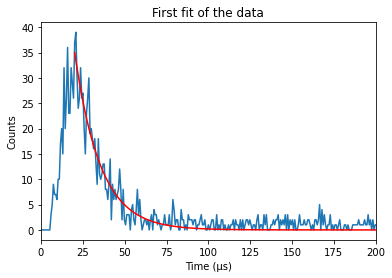

In [8]:
import matplotlib.pyplot as plt

plt.plot(data[:,0], data[:,1])
plt.xlim(0, 200)

plt.plot(x, exp(x, *popt), 'r-')
plt.xlabel("Time (µs)")
plt.ylabel("Counts")
plt.title("First fit of the data")

In [9]:
tau = popt[1]
print(f"Muon lifetime: {tau:.3f} µs")

Muon lifetime: 15.249 µs


This is *obviously* not the value we expect

# Second acquisition

In [10]:
# Load the data
file = "data/muon_acquisition_17h_19-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

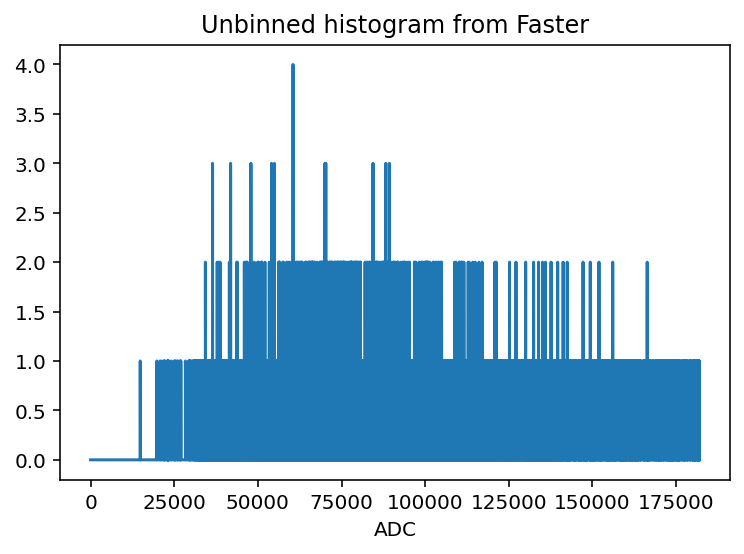

In [11]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.plot(data[:,0], data[:,1])
plt.xlabel('ADC')
plt.title('Unbinned histogram from Faster')
plt.gcf().set_facecolor("white");

### Fit on the ADC axis

tau = 2.431408e+00±0.09 µs


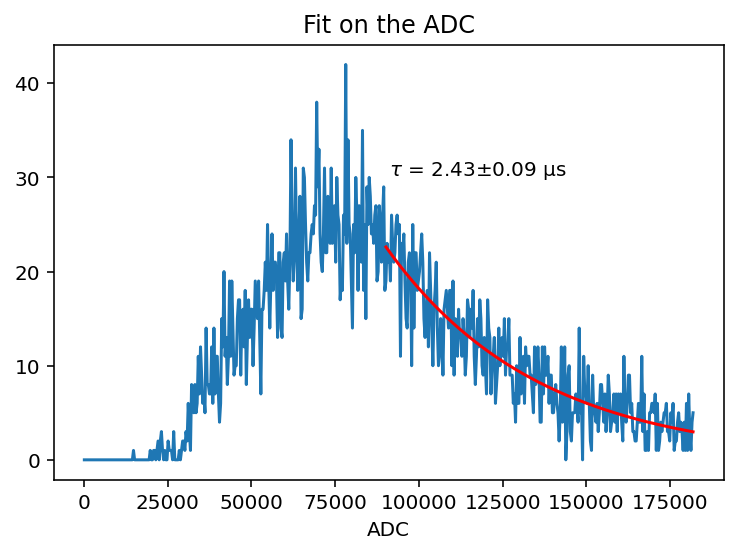

In [12]:
# Fit the hist on the ACD

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from scipy.optimize import curve_fit
from muon_hardware.utils import linear
from muon_hardware.utils import rebin, exp

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
ADC_to_t = calibrate_TAC()

# Load the data
file = "data/muon_acquisition_17h_19-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

# Rebin the histogram
bins = 550
data_rebinned = rebin(data[:,0], data[:,1], bins)

mask = (data_rebinned[:,0] > 90000) 
x = data_rebinned[:,0][mask]
y = data_rebinned[:,1][mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 10000])
perr = np.sqrt(np.diag(pcov))
print(f'tau = {linear(popt[1], *ADC_to_t):2e}±{linear(perr[1], *ADC_to_t):.2f} µs')

plt.plot(data_rebinned[:,0], data_rebinned[:,1])
plt.plot(x, exp(x, *popt), 'r-')
plt.text(0.5, 0.7, f'$\\tau$ = {linear(popt[1], *ADC_to_t):.2f}±{linear(perr[1], *ADC_to_t):.2f} µs', transform=plt.gca().transAxes)
plt.xlabel('ADC')
plt.title('Fit on the ADC')
plt.gcf().set_facecolor("white");

### Fit on the times axis

tau = 2.419592e+00±0.10 µs


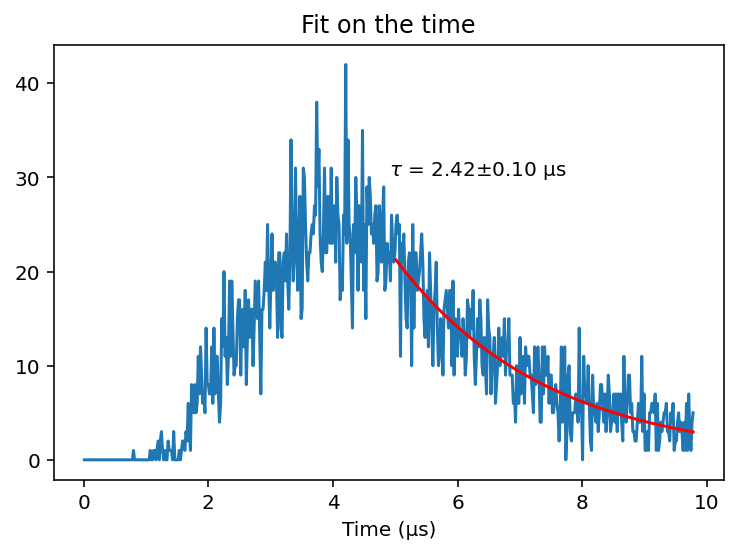

In [13]:
# Fit the hist on the times

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from scipy.optimize import curve_fit
from muon_hardware.utils import linear
from muon_hardware.utils import rebin, exp

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
ADC_to_t = calibrate_TAC()

# Load the data
file = "data/muon_acquisition_17h_19-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

# Rebin the histogram
bins = 550
data_rebinned = rebin(data[:,0], data[:,1], bins)
data_rebinned[:,0] = linear(data_rebinned[:,0], *ADC_to_t) # Convert time to µs

mask = (data_rebinned[:,0] > 5) 
x = data_rebinned[:,0][mask]
y = data_rebinned[:,1][mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 5])
perr = np.sqrt(np.diag(pcov))
print(f'tau = {popt[1]:2e}±{perr[1]:.2f} µs')

plt.plot(data_rebinned[:,0], data_rebinned[:,1])
plt.plot(x, exp(x, *popt), 'r-')
plt.text(0.5, 0.7, f'$\\tau$ = {popt[1]:.2f}±{perr[1]:.2f} µs', transform=plt.gca().transAxes)
plt.xlabel('Time (µs)')
plt.title('Fit on the time')
plt.gcf().set_facecolor("white");

# Changing the amplifier parameters
We expect a peak at 3 µs instead of 5 µs

tau = 2.210584e+00±0.05 µs


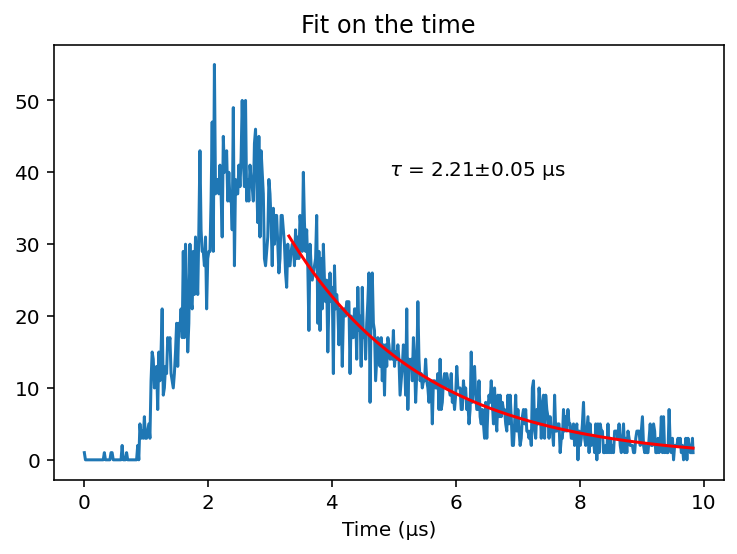

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from scipy.optimize import curve_fit
from muon_hardware.utils import linear
from muon_hardware.utils import rebin, exp

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
ADC_to_t = calibrate_TAC()

# Load the data
file = "data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

# Rebin the histogram
bins = 550
data_rebinned = rebin(data[:,0], data[:,1], bins)
data_rebinned[:,0] = linear(data_rebinned[:,0], *ADC_to_t) # Convert time to µs

mask = (data_rebinned[:,0] > 3.3) 
x = data_rebinned[:,0][mask]
y = data_rebinned[:,1][mask]

popt, pcov = curve_fit(exp, x, y, p0=[1, 5])
perr = np.sqrt(np.diag(pcov))
print(f'tau = {popt[1]:2e}±{perr[1]:.2f} µs')

plt.plot(data_rebinned[:,0], data_rebinned[:,1])
plt.plot(x, exp(x, *popt), 'r-')
plt.text(0.5, 0.7, f'$\\tau$ = {popt[1]:.2f}±{perr[1]:.2f} µs', transform=plt.gca().transAxes)
plt.xlabel('Time (µs)')
plt.title('Fit on the time')
plt.gcf().set_facecolor("white");

### Plot the two smoothed curves on top of each other to show the difference in peak position 

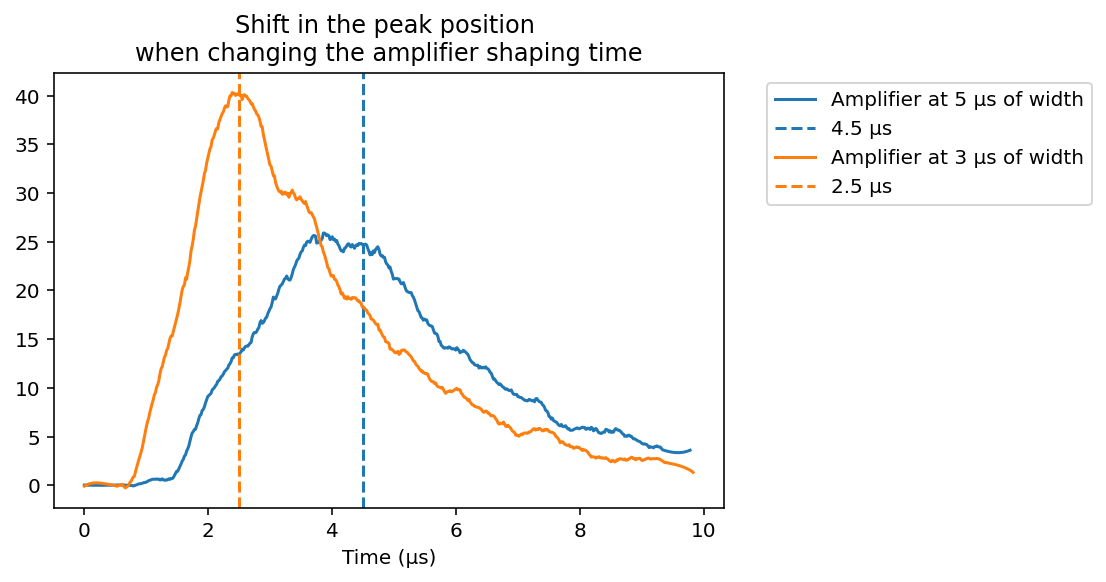

In [14]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Calibrate the TAC
from muon_hardware.calibration import calibrate_TAC
ADC_to_t = calibrate_TAC()


####### First file (5 µs) #######
file = "data/muon_acquisition_17h-19-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

# Rebin the histogram
bins = 550
data_rebinned = rebin(data[:,0], data[:,1], bins)
data_rebinned[:,0] = linear(data_rebinned[:,0], *ADC_to_t) # Convert time to µs

smoothed_data = savgol_filter(data_rebinned[:,1], 51, 3)

plt.plot(data_rebinned[:,0], smoothed_data, label='Amplifier at 5 µs of width', color='C0')
plt.axvline(4.5, color='C0', linestyle='--', label='4.5 µs')


####### Second file (3 µs) #######
file = "data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt"
data = np.loadtxt(file, skiprows=2, delimiter=";") 

# Remove empty hist part
nonempty = np.nonzero(data[:,1]) # Get list of indices of nonempty hist values
max_nonempty = np.max(nonempty) # Get the indice of the last non empty bin
data = data[:max_nonempty+2] # Remove the empty values after last filled bin

# Rebin the histogram
bins = 550
data_rebinned = rebin(data[:,0], data[:,1], bins)
data_rebinned[:,0] = linear(data_rebinned[:,0], *ADC_to_t) # Convert time to µs

smoothed_data = savgol_filter(data_rebinned[:,1], 51, 3)

plt.plot(data_rebinned[:,0], smoothed_data, label='Amplifier at 3 µs of width', color='C1')
plt.axvline(2.5, color='C1', linestyle='--', label='2.5 µs')


####### Third file (1 µs) #######







plt.xlabel('Time (µs)')
plt.title('Shift in the peak position \nwhen changing the amplifier shaping time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_facecolor("white");

# Determine the best fit start and best binning in regards to the $\chi^2$

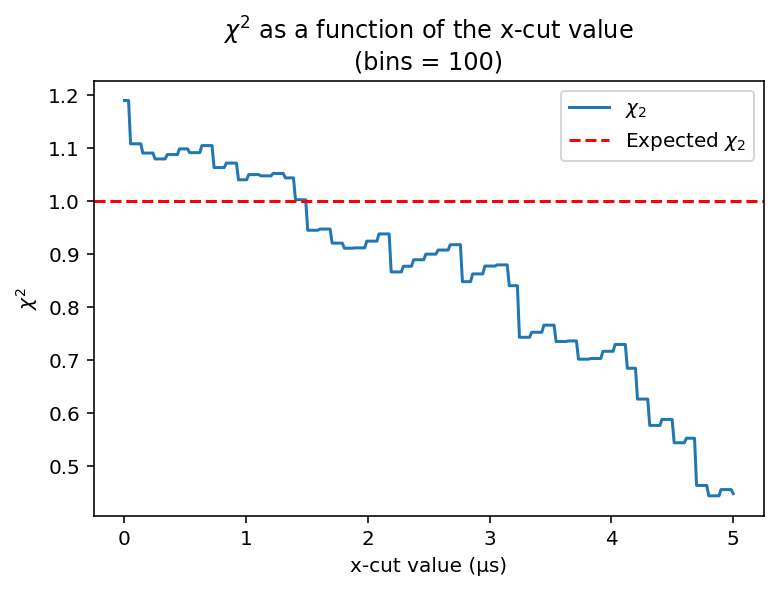

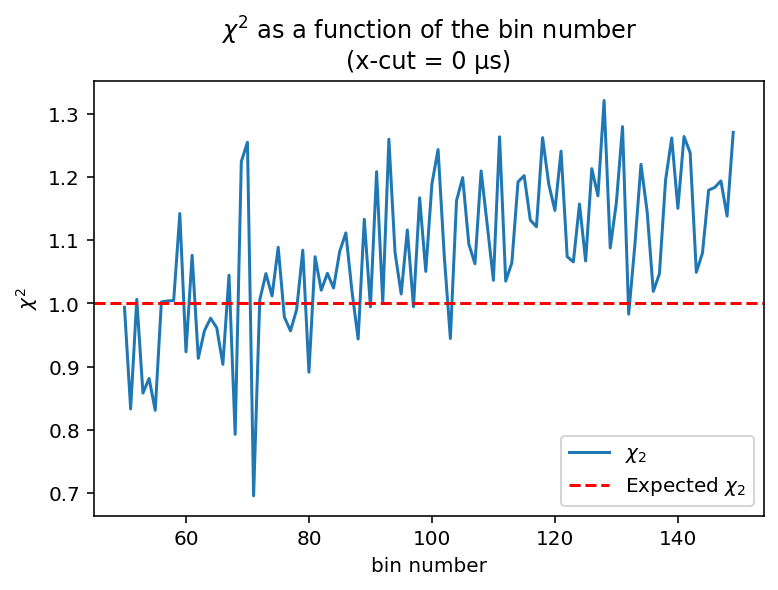

In [12]:
from muon_hardware.analysis import muon_lifetime
from muon_hardware.plots import x_cut_plot, bin_plot
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

# Load the data
file = "data/acquisition_spectrum_CFD_24h00_FINAL-29-09-2023.txt"

Object = muon_lifetime(file)

x_cut_plot(Object, x_cut_list=np.linspace(0, 5, 300), bins=100)

bin_plot(Object, bins_list=np.arange(50, 150), x_cut=0);

# Analysis of the acquisitions

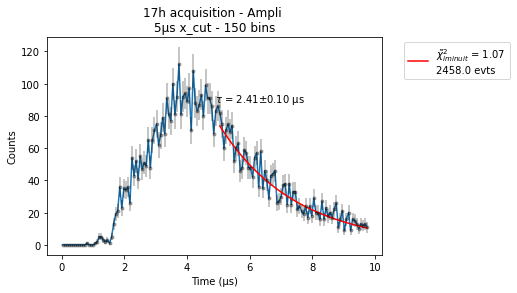

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/muon_acquisition_17h-19-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 150)

Object.exp_fit(x_cut=5)

fig, ax = Object.plot_final_results()

# ax.axvline(5, color='C1', linestyle='--', label='x_cut = 5 µs', alpha=0.5)
ax.set_title('17h acquisition - Ampli \n5µs x_cut - 150 bins');

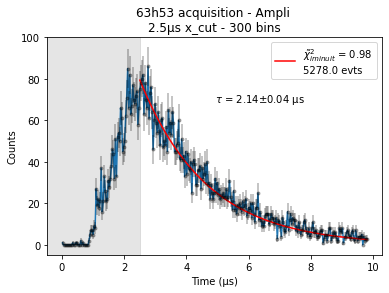

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 300)

Object.exp_fit(x_cut=2.5)

fig, ax = Object.plot_final_results()

ax.set_title('63h53 acquisition - Ampli \n2.5µs x_cut - 300 bins');

# Fill the unfitted area with gray
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.fill_between([xlim[0], 2.5], *ylim, color='gray', alpha=0.2)
ax.set_ylim(*ylim)
ax.set_xlim(*xlim)
ax.legend(bbox_to_anchor=(1, 1), loc='upper right');

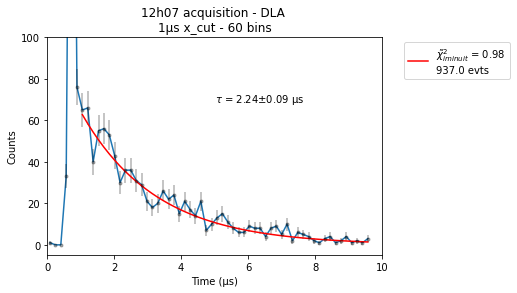

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/acquisition_spectrum_12h07-27-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 60)

Object.exp_fit(x_cut=1)

fig, ax = Object.plot_final_results()

ax.set_xlim(0, 10)
ax.set_ylim(-4.8, 100)
ax.set_title('12h07 acquisition - DLA \n1µs x_cut - 60 bins');

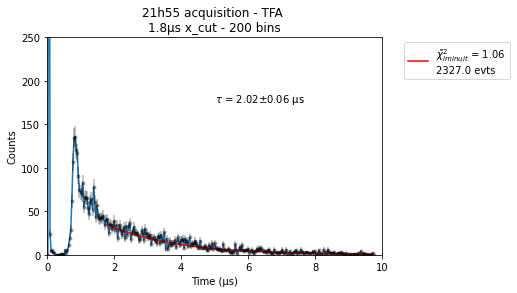

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/acquisition_spectrum_TFA_21h55-28-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 300)

Object.exp_fit(x_cut=1.8)

fig, ax = Object.plot_final_results()
ax.set_xlim(0, 10)
ax.set_ylim(0, 250)
# ax.axvline(0.80, c='k')
ax.set_title('21h55 acquisition - TFA \n1.8µs x_cut - 200 bins');

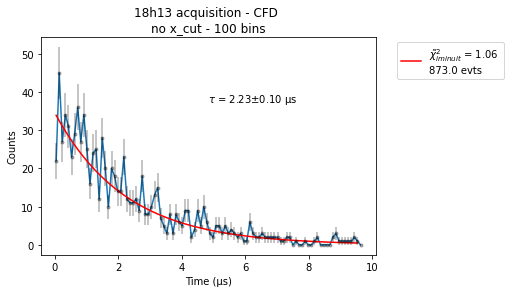

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/acquisition_spectrum_CFD_18h13-29-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 100)

Object.exp_fit(x_cut=0)

fig, ax = Object.plot_final_results()

ax.set_title('18h13 acquisition - CFD \nno x_cut - 100 bins');

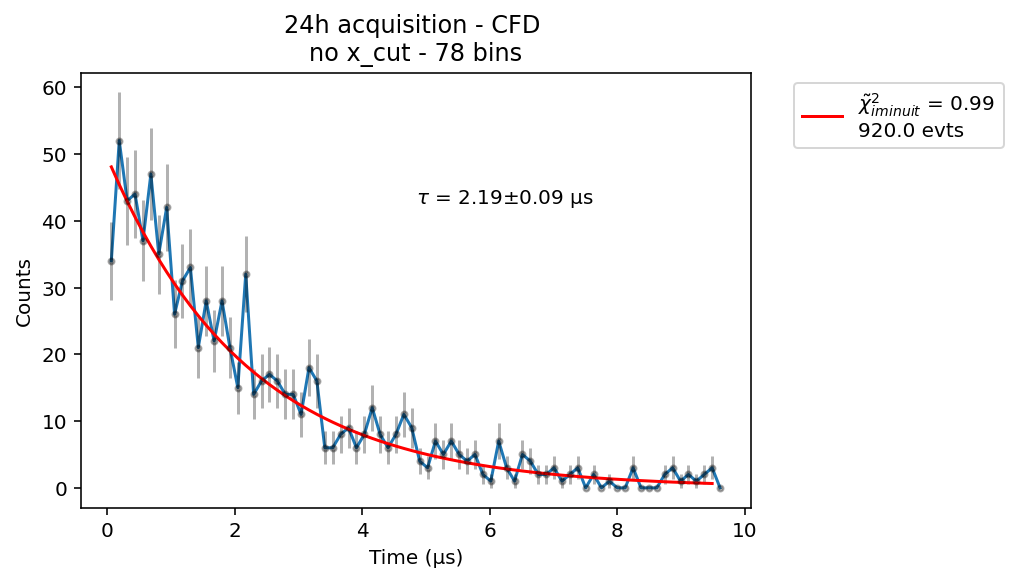

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# Load the data
file = "data/acquisition_spectrum_CFD_24h00_FINAL-29-09-2023.txt"

from muon_hardware.analysis import muon_lifetime

Object = muon_lifetime(file)

Object.rebin_hist(bins = 78) #85

Object.exp_fit(x_cut=0)

fig, ax = Object.plot_final_results()

ax.set_title('24h acquisition - CFD \nno x_cut - 78 bins');

# Get all the $\tau$ values with their error bars


In [32]:
import numpy as np
from muon_hardware.analysis import muon_lifetime

files = ['data/muon_acquisition_17h-19-09-2023.txt',
         'data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt',
         'data/acquisition_spectrum_12h07-27-09-2023.txt',
         'data/acquisition_spectrum_TFA_21h55-28-09-2023.txt',
         'data/acquisition_spectrum_CFD_24h00_FINAL-29-09-2023.txt']
method = ['Amp (2458 evts)',
          'Amp (5278 evts)',
          'DLA (937 evts)',
          'TFA (2310 evts)',
          'CFD (920 evts)']
x_cut_list = [5, 2.5, 1, 1.8, 0]
bins_list = [150, 300, 60, 200, 78]

tau = []
tau_err = []
chi2 = []

stored_values = 'data/muon_lifetime_analog.npy'
do_all = True # To do all the files that have already been computed

# First, load the stored values
if do_all:
    dic = {} #np.load(stored_values, allow_pickle=True)
    dic['files'] = []
    dic['method'] = []
    dic['tau'] = []
    dic['tau_err'] = []
    dic['chi2'] = []

for i, file in enumerate(files[1:], start=1): # Start at 1 to skip the first file
    if do_all or file not in dic['files']:
        print(f"Reading file {file}")
        Object = muon_lifetime(file)
        
        delay = Object.rebin_hist(bins=bins_list[i])

        Object.exp_fit(x_cut = x_cut_list[i], method='iminuit') 
        
        tau.append(Object.tau)
        tau_err.append(Object.tau_err)
        chi2.append(Object.chi2)
        
        dic['files'].append(file)
        dic['method'].append(method[i])
        dic['tau'].append(Object.tau)
        dic['tau_err'].append(Object.tau_err)
        dic['chi2'].append(Object.chi2)

# Save the new values
np.save(stored_values, dic)

Reading file data/acquisitio_spectrum_weekend_63h53-25-09-2023.txt
Reading file data/acquisition_spectrum_12h07-27-09-2023.txt
Reading file data/acquisition_spectrum_TFA_21h55-28-09-2023.txt
Reading file data/acquisition_spectrum_CFD_24h00_FINAL-29-09-2023.txt


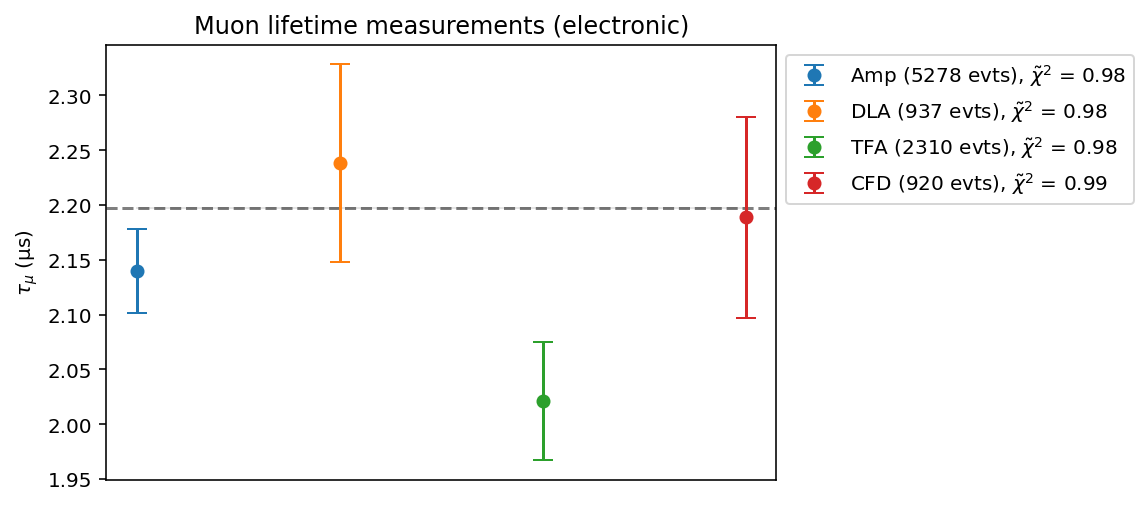

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
    
dic = np.load('data/muon_lifetime_analog.npy', allow_pickle=True).item()
tau = dic['tau']
tau_err = dic['tau_err']
chi2 = dic['chi2']
method = dic['method']

th_value = 2.197
th_err = 2.2e-6
x_axis = np.linspace(0, 1, len(tau))  
plt.axhline(th_value, ls='--', c='k', alpha=0.5)
plt.fill_between(x_axis, th_value-th_err, th_value+th_err, color='k', alpha=0.1)

for i in range(len(tau)):
    label = method[i] + f", $\\tilde{{\chi}}^2$ = {chi2[i]:.2f}"
    eb = plt.errorbar(x_axis[i], tau[i], yerr=tau_err[i], marker='o', ls='none', capsize=5, label=label)
    # eb[-1][0].set_linestyle('--') # Modify error bars linestyle

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.ylabel(f'$\\tau_µ$ (µs)')
plt.title('Muon lifetime measurements (electronic)')
plt.gca().get_xaxis().set_visible(False)
plt.gcf().set_facecolor('white')
plt.savefig('images/hardware_analysis/muon_lifetime_electronical.png', dpi=300, bbox_inches='tight');